## CHOOSING THE RIGHT MODEL OR ESTIMATOR FOR MACHINE LEARNING

- An end-to-end Scikit-Learn workflow
- Getting the Data ready
- Choose the right estimator/algorithm for the problem
- Fit the model/algorithm and it use it to make predictions on the data
- Evaluating the model pwrformance
- Save and load the trained model
- Putting it altogether

<b> Scikit-Learn uses estimator as another term for machine learning model or algorithm </b>

- CLASSIFICATION - THATS PREDICTING YES OR NO. Is it a TREE or NOT A TREE
- REGRESSION - PREDICTING A NUMBER. The cost of a house. Boston house Dataset

<a href="https://scikit-learn.org/stable/machine_learning_map.html"> Choose Right Model Map </a>
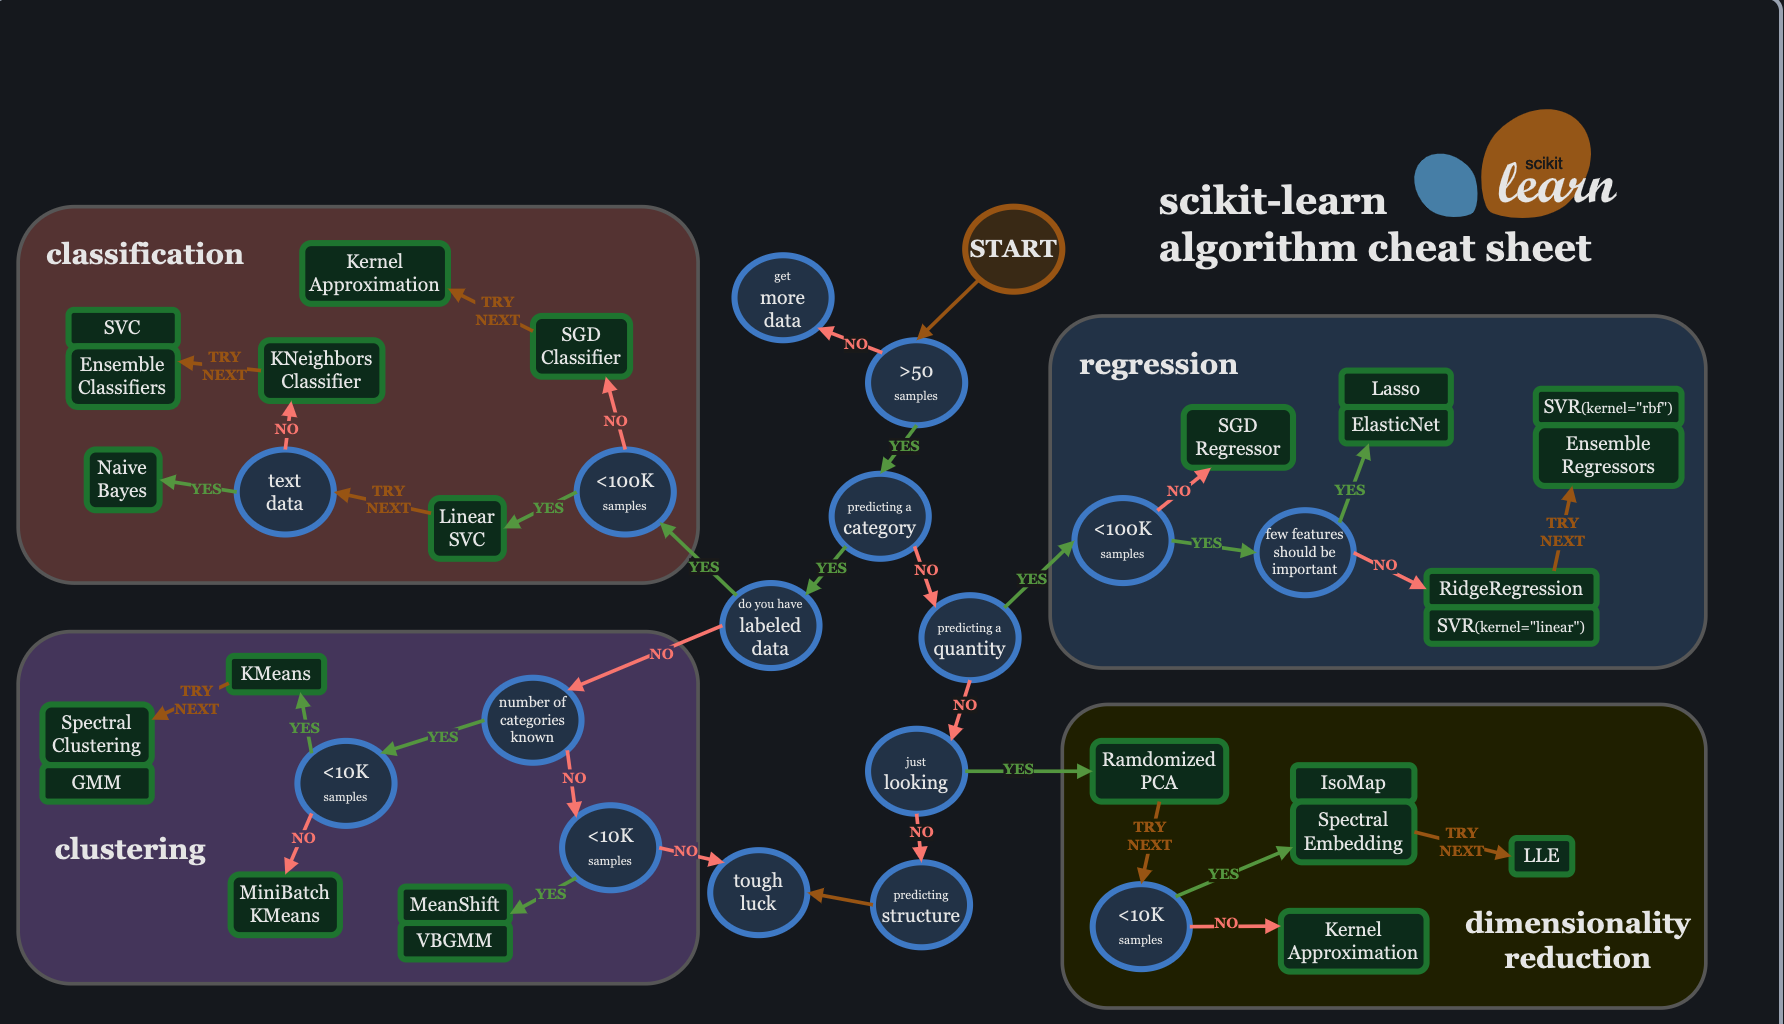

# PICKING A MACHINE LEARNING MODEL FOR A REGRESSION
- USING THE BOSTON DATASET 

In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [31]:
boston_df = pd.DataFrame(boston["data"], columns=boston['feature_names'])
boston_df['target'] = pd.Series([boston["target"]])

In [32]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,"[24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27...."
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,NaN
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,NaN
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,NaN


## Using Ridge Regression based on the map flow 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,"[24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27...."
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,NaN


In [34]:
# # SPLIT INTO TRAIN AND TEST SETS

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate the model 
# model = Ridge()

# # Train the model with the train datasets
# model.fit(X_train, y_train)


import pandas as pd
from sklearn.datasets import load_boston

# Load dataset (for demo; the Boston dataset is deprecated)
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# Combine into one DataFrame to drop NaNs from target
data = X.copy()
data['target'] = y

# Drop rows where target is NaN
data = data.dropna(subset=['target'])

# Separate features and target
X_clean = data.drop('target', axis=1)
y_clean = data['target']

# Proceed with splitting and model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)


/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

Ridge()

In [35]:
# Make Predictions or Evaluate the model on the test data sets

model.score(X_test, y_test)

0.6662221670168519

### IMPROVING THE SCORE
- How to improve the score 
- What if Ridge was not working

In [46]:
# Lets try RandomForest
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# X = boston_df.drop("target", axis=1)
# y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


# Instantiate RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


rf_model.score(X_test, y_test)

0.8922527442109116

In [ ]:
# RandomForest performs better than Ridge as the score to that of Ridge is 0.892 to 0.666